In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import LogisticRegression

import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('./diabetes.csv')
df = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age', 'Outcome']]

x = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=31)

In [11]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

lr = LogisticRegression(random_state=0, solver='liblinear')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
f1 = f1_score(y_test, y_pred, average='micro')
f1

0.7604166666666666

In [12]:
lr = LogisticRegression()

parameters = {'C': [x / 10.0 for x in range(1, 100)], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
search = GridSearchCV(lr, parameters, scoring='f1_micro')
search.fit(x,y)
best_lr = search.best_estimator_

In [13]:
print(search.best_score_)
print(search.best_params_)

0.7760971055088701
{'C': 4.8, 'penalty': 'l2', 'solver': 'lbfgs'}


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[110,  15],
       [ 23,  44]], dtype=int64)

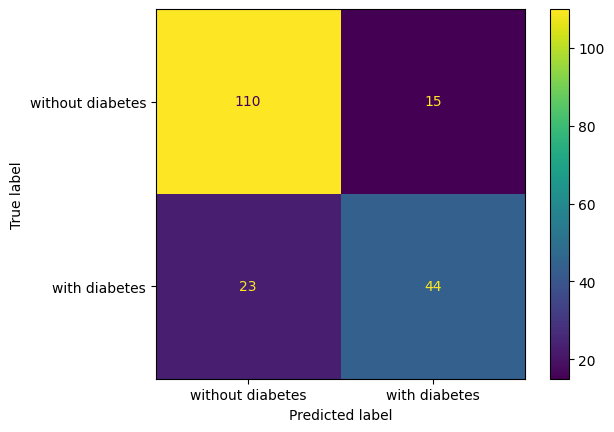

In [28]:
target_names = ['without diabetes', 'with diabetes']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()

In [19]:
from sklearn.metrics import classification_report

target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.83      0.88      0.85       125
   with diabetes       0.75      0.66      0.70        67

        accuracy                           0.80       192
       macro avg       0.79      0.77      0.78       192
    weighted avg       0.80      0.80      0.80       192



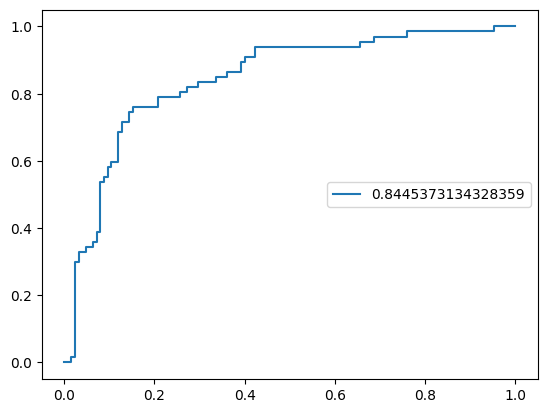

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = best_lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=str(auc))
plt.legend(loc=5)
plt.show()

In [29]:
from  sklearn import tree
from  sklearn.tree import DecisionTreeClassifier

In [31]:
np.random.seed = 31

clf = DecisionTreeClassifier(class_weight='balanced', random_state=31)

parameters = {'max_depth': range(1,10), 'min_samples_split': range(2, 40), 'criterion': ['gini', 'entropy', 'log_loss']}
search = GridSearchCV(clf, parameters, scoring='f1_micro')
search.fit(x,y)
best_tree = search.best_estimator_

In [32]:
print(search.best_score_)
print(search.best_params_)

0.7305831423478482
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 6}


In [34]:
y_pred = best_tree.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 31],
       [ 5, 62]], dtype=int64)

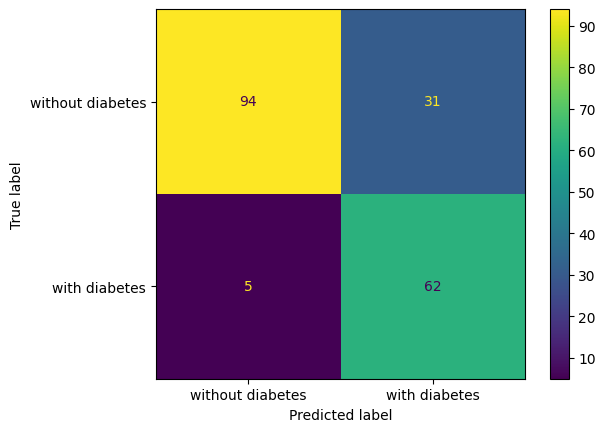

In [35]:
target_names = ['without diabetes', 'with diabetes']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()

[Text(0.4817073170731707, 0.9166666666666666, 'Glucose <= 127.5\ngini = 0.5\nsamples = 768\nvalue = [384.0, 384.0]\nclass = with diabetes'),
 Text(0.22560975609756098, 0.75, 'Age <= 28.5\ngini = 0.428\nsamples = 485\nvalue = [300.288, 134.687]\nclass = without diabetes'),
 Text(0.12195121951219512, 0.5833333333333334, 'BMI <= 30.95\ngini = 0.251\nsamples = 271\nvalue = [190.464, 32.955]\nclass = without diabetes'),
 Text(0.07317073170731707, 0.4166666666666667, 'Pregnancies <= 7.5\ngini = 0.048\nsamples = 151\nvalue = [114.432, 2.866]\nclass = without diabetes'),
 Text(0.04878048780487805, 0.25, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.024\nsamples = 150\nvalue = [114.432, 1.433]\nclass = without diabetes'),
 Text(0.024390243902439025, 0.08333333333333333, 'gini = 0.0\nsamples = 131\nvalue = [100.608, 0.0]\nclass = without diabetes'),
 Text(0.07317073170731707, 0.08333333333333333, 'gini = 0.17\nsamples = 19\nvalue = [13.824, 1.433]\nclass = without diabetes'),
 Text(0.097560975609

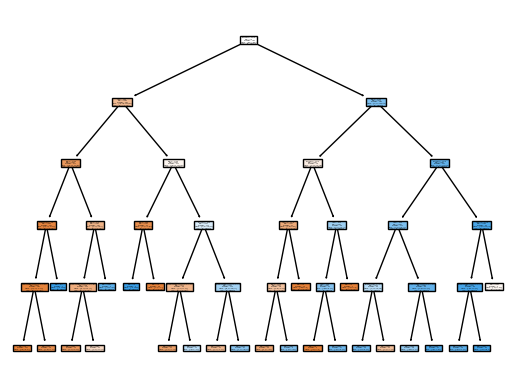

In [37]:
fn = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
cn = ['without diabetes', 'with diabetes']
tree.plot_tree(best_tree, feature_names=fn, class_names=cn, filled=True)